# Heart Attack Analysis & Prediction

#### Problem Statement - 
The objective of this study is to effectively predict if the patient suffers from heart disease. The health
professional enters the input values from the patient's health report. Create a model which predicts the
probability of having heart disease.

 Description of fields in heart dataset:

• age - age in years

• sex-(1=male;0=female)

• cp - chest pain type

• trestbps - resting blood pressure (in mm Hg on admission to the hospital)

• chol - serum cholestoral in mg/dl

• fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

• restecg - resting electrocardiographic results

• thalach - maximum heart rate achieved

• exang - exercise induced angina (1 = yes; 0 = no)

• oldpeak - ST depression induced by exercise relative to rest

• slope - the slope of the peak exercise ST segment

• ca - number of major vessels (0-3) colored by flourosopy

• thal -displays the thalassemia :, 3 = normal; 6 = fixed defect; 7 = reversable defect

• output - have disease or not (1=yes, 0=no)

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (20, 10)
df=pd.read_csv('heart.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Checking for the null values

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### Checking for the Duplicates

In [5]:
print('NO of duplicates before',df.duplicated().sum())
df.drop_duplicates(inplace=True)
print('No of duplicates after', df.duplicated().sum())

NO of duplicates before 1
No of duplicates after 0


#### Checking for the outliers 

Our data has no such extrem outlier

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

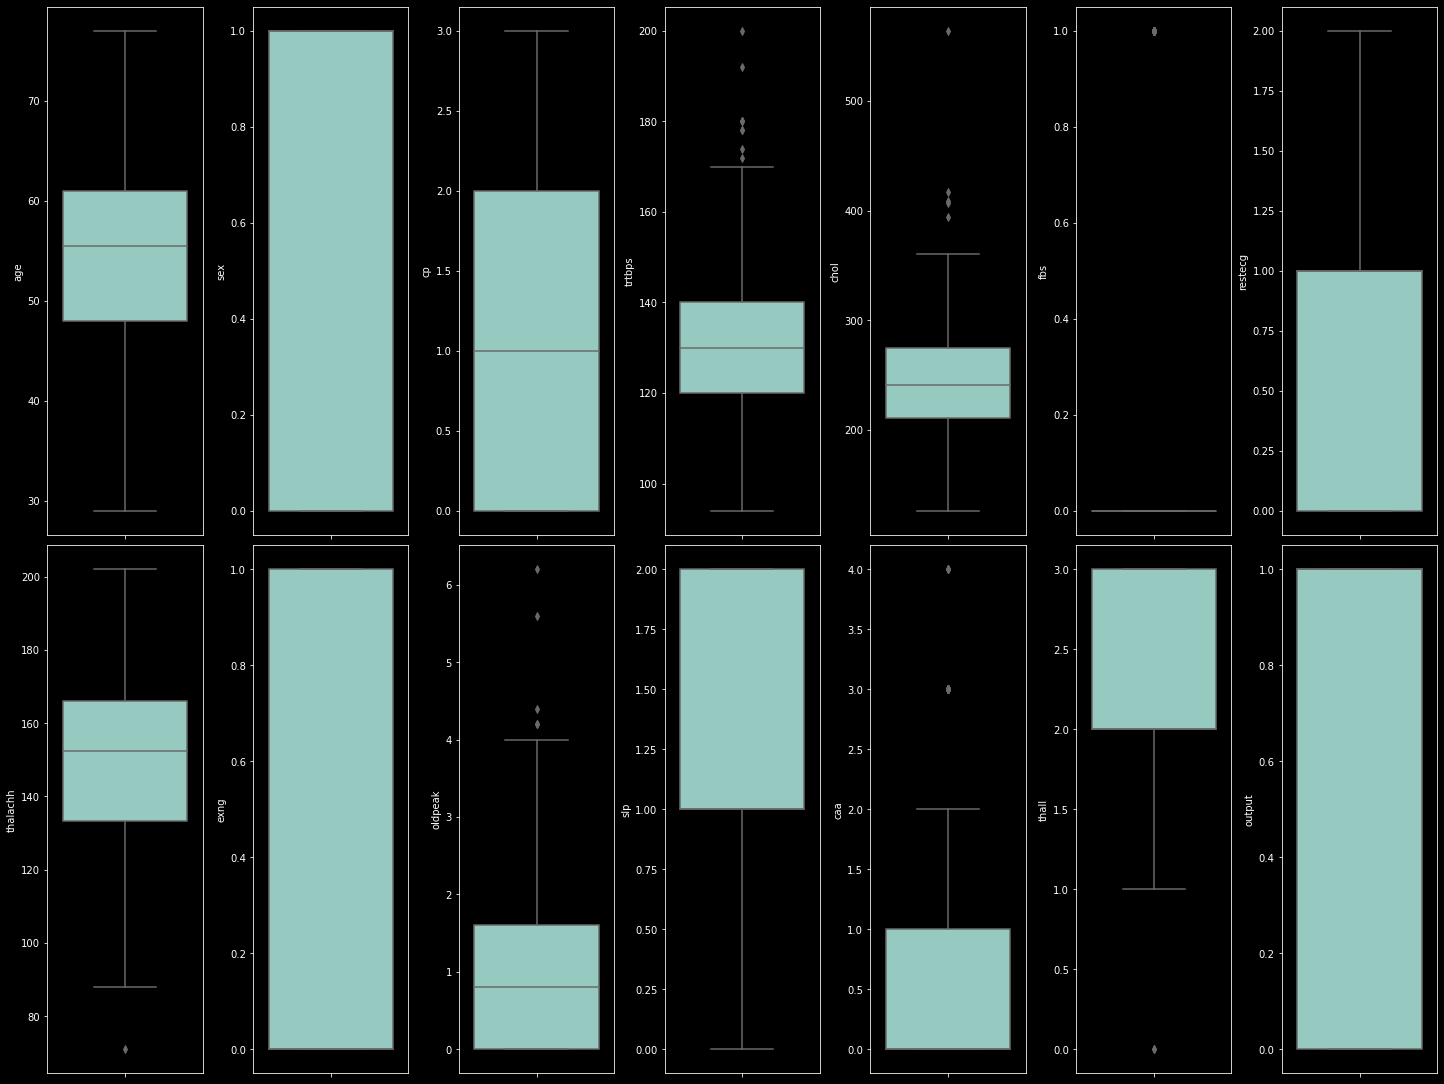

In [7]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,15))
index=0
ax=ax.flatten()

for cols , value in df.items():
    if cols != 'type':
        sns.boxplot(y=cols,data=df,ax=ax[index])
        index += 1
        
        
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=0.7)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

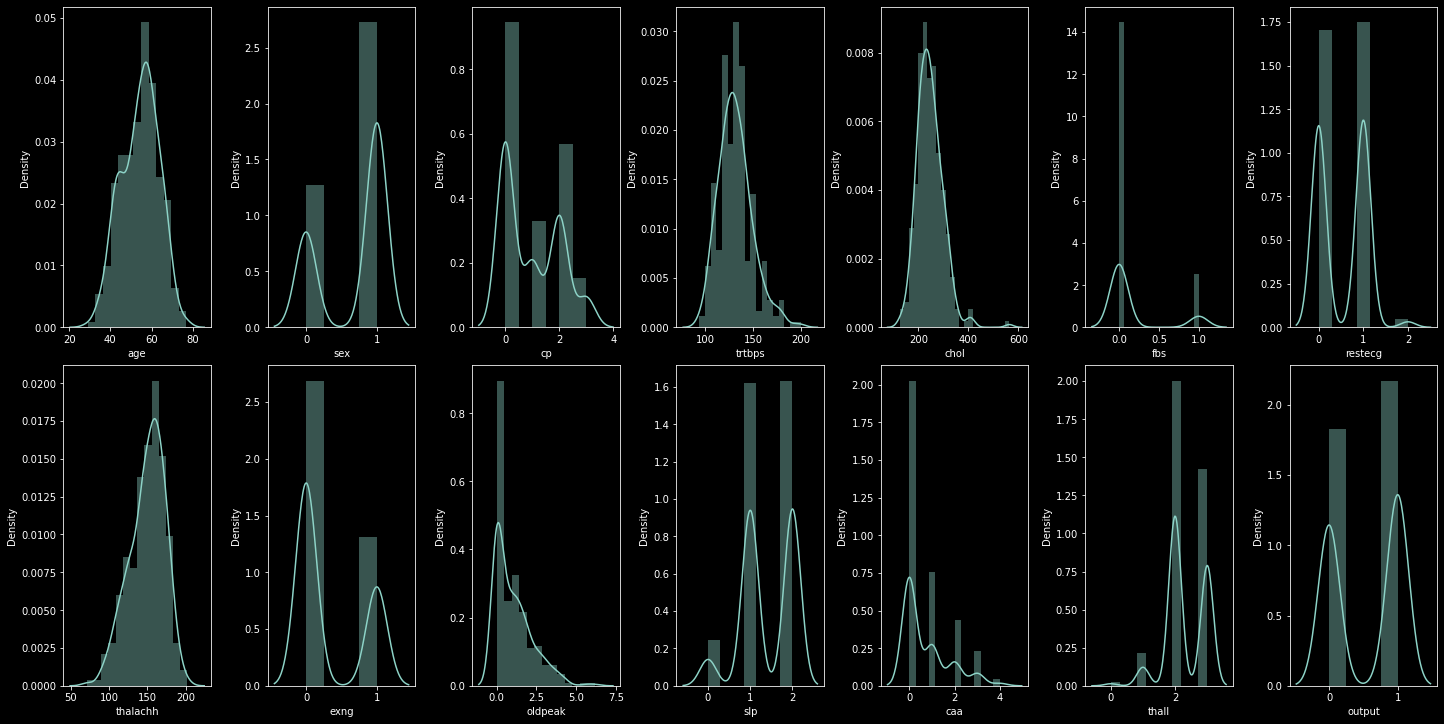

In [8]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()

for cols , value in df.items():
    if cols != 'type':
        sns.distplot(value,ax=ax[index])
        index += 1
        
        
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=0.7)
plt.show()

In [9]:
df.shape

(302, 14)

## Correlation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

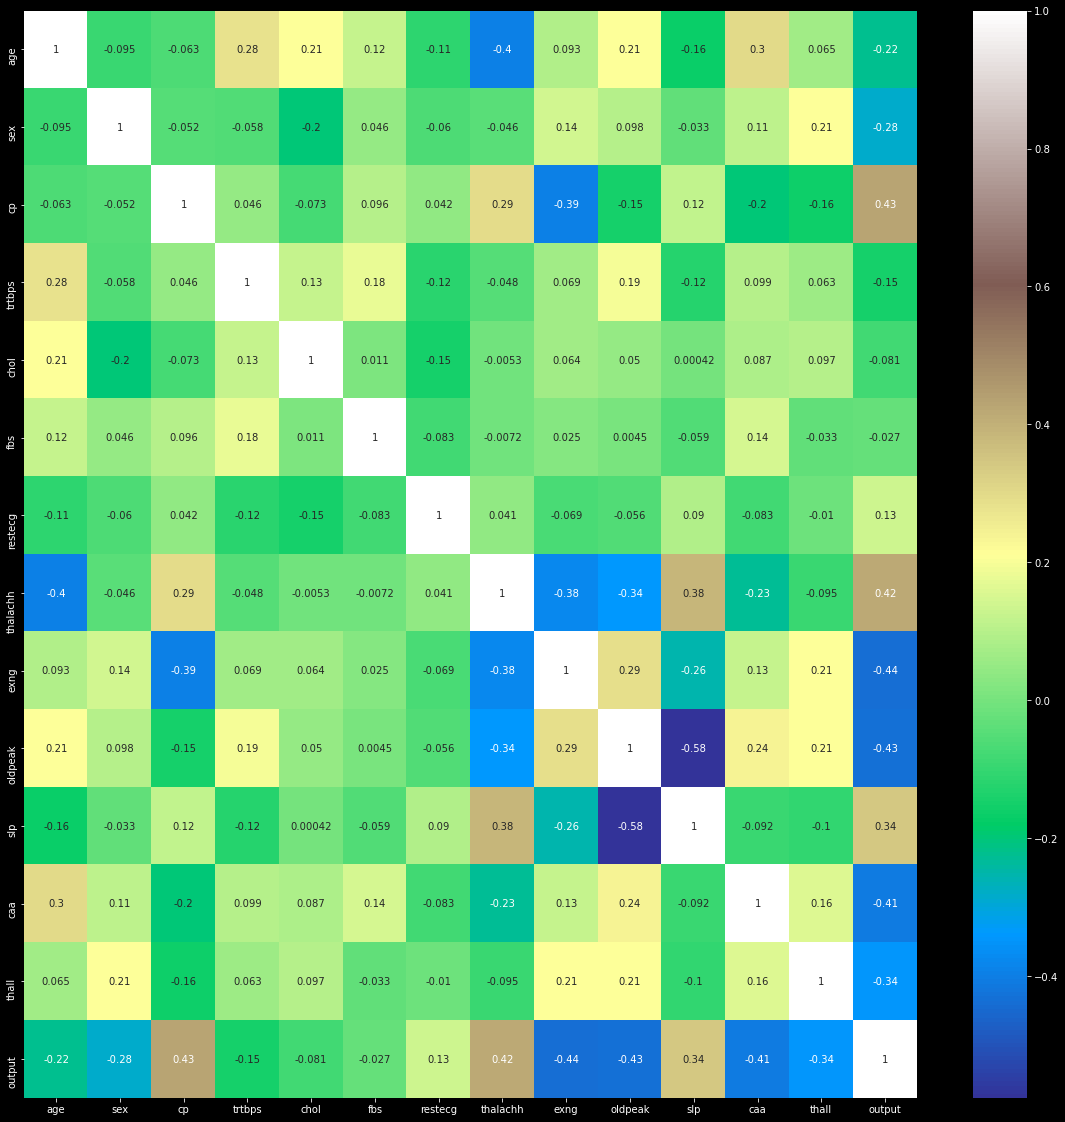

In [10]:
plt.figure(figsize=(20,20))
mat_corr=df.corr()
top_corr_features = mat_corr.index
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="terrain")
plt.show()

In [11]:
df.shape

(302, 14)

## Visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

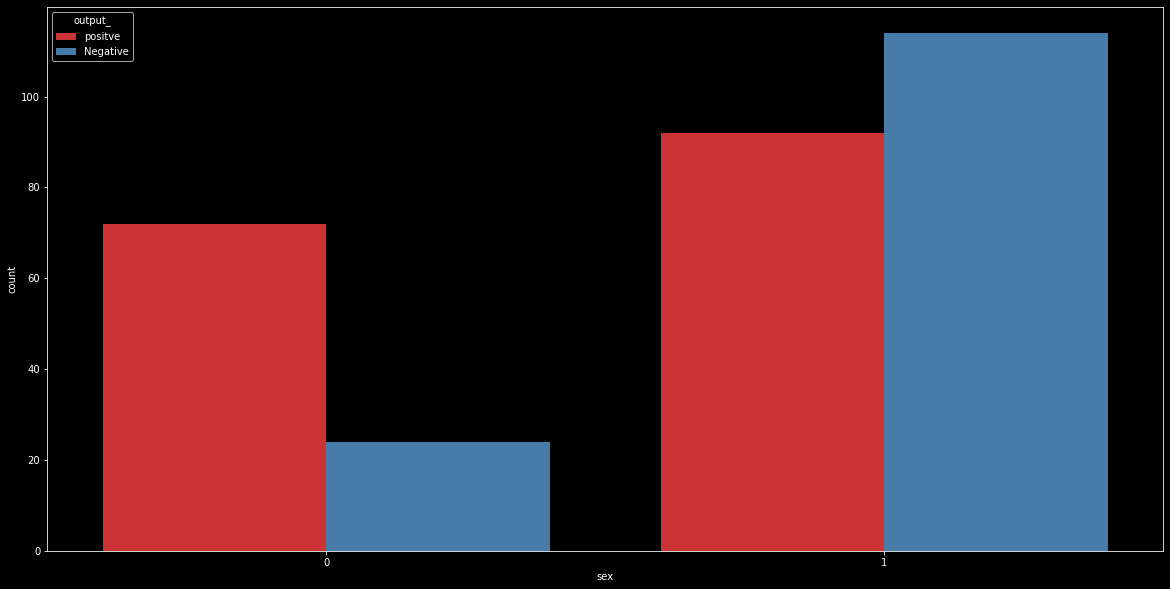

In [12]:
df['output_']=df['output'].map({0:'Negative',1:'positve'})
sns.countplot(x='sex',hue='output_',palette='Set1',data=df)
plt.show()

From the above observation we can say that Cardiovascular disease is not dependent on the 
sex of the person . Either its a Male or an Female the possibility is quit similar.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

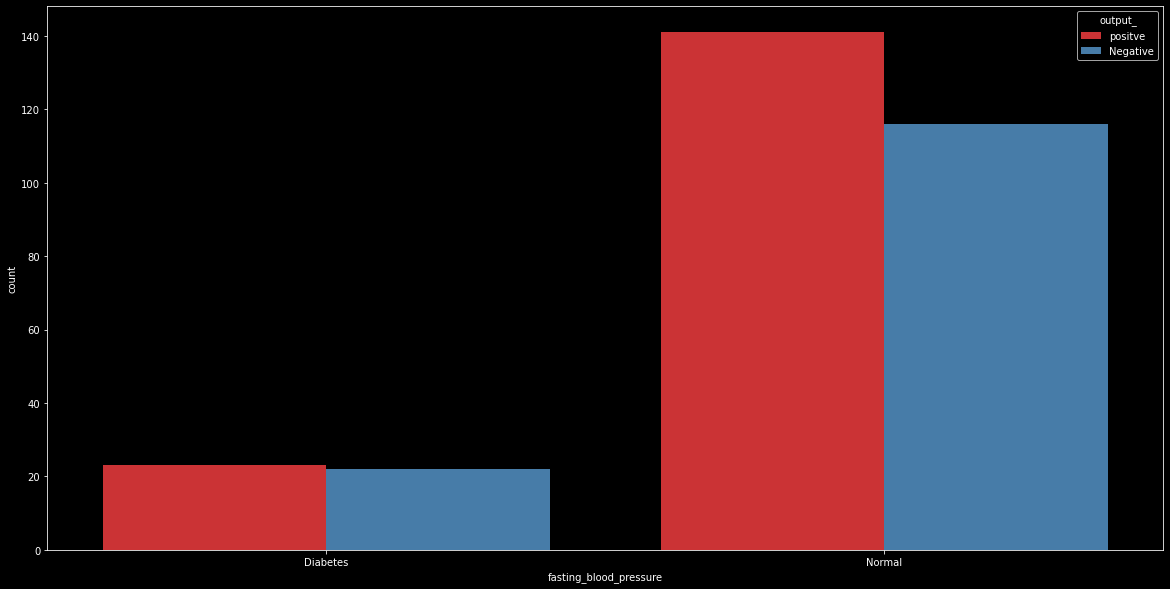

In [13]:
df['fasting_blood_pressure']=df['fbs'].map({0:'Normal',1:'Diabetes'})
sns.countplot(x='fasting_blood_pressure',hue='output_',palette='Set1',data=df)
plt.show()

From the above graph we can say that if the Fasting blood sugar is less than 120mg/dl
,the chances of having a Cardiovescular disease is more.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

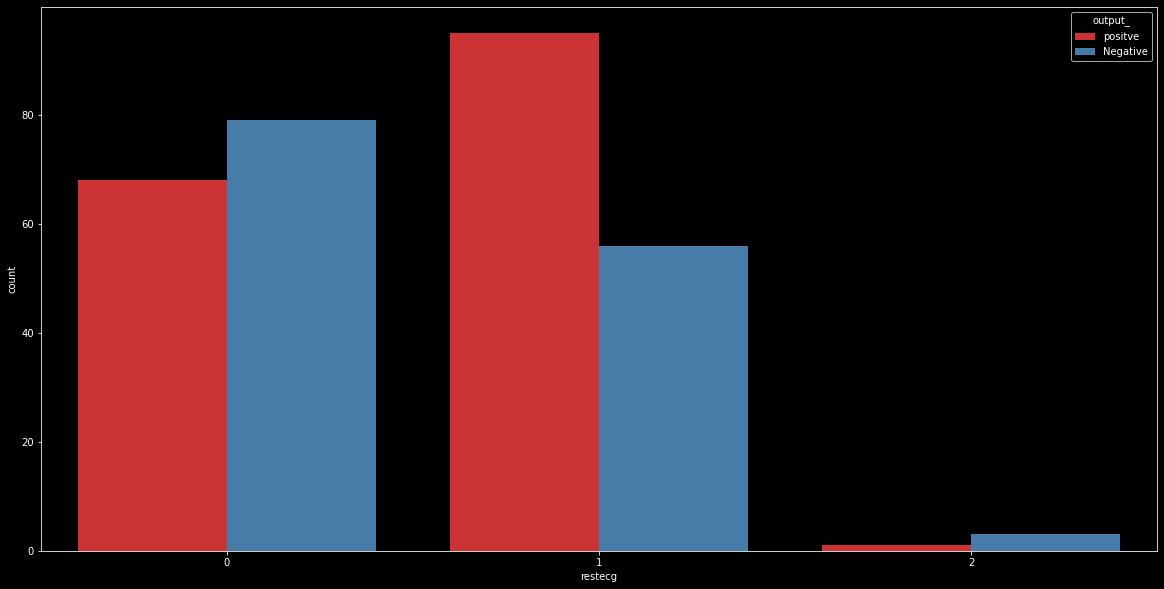

In [14]:
#Resting ecg - {0:'Noraml'},{1:'Having ST-T wave abnormality'},{2:'left ventricular hypertharapy'}
sns.countplot(x='restecg',hue='output_',palette='Set1',data=df)
plt.show()

When there is ST-t wave abnormality the chances of the heart attack is more 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

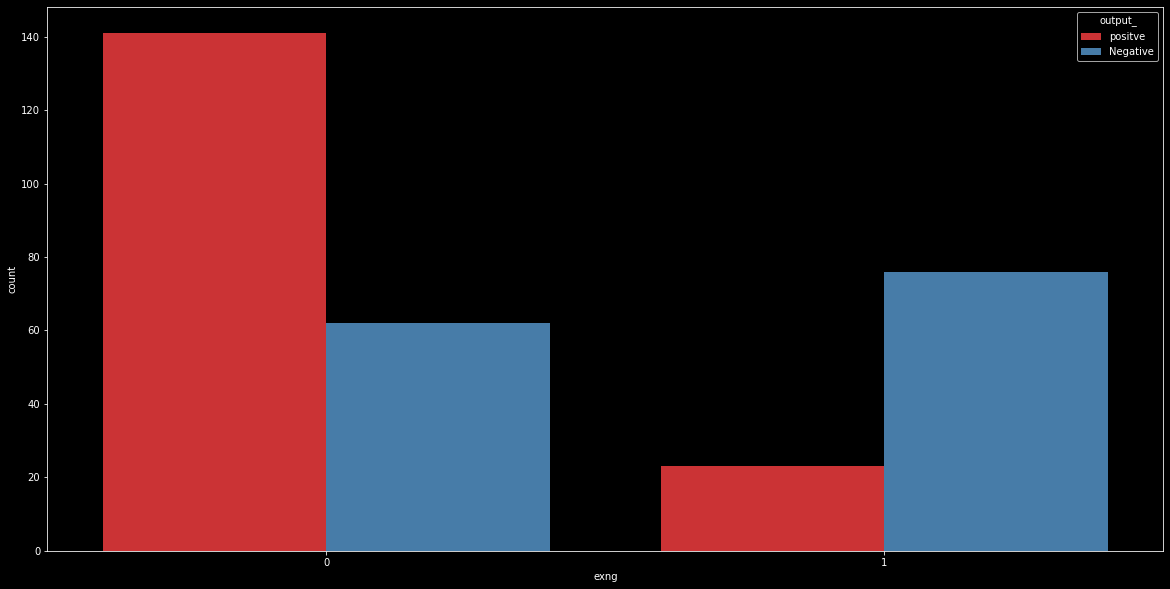

In [15]:
sns.countplot(x='exng',hue='output_',palette='Set1',data=df)
plt.show()

exercise induced angina have less chances of having a heart attack

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

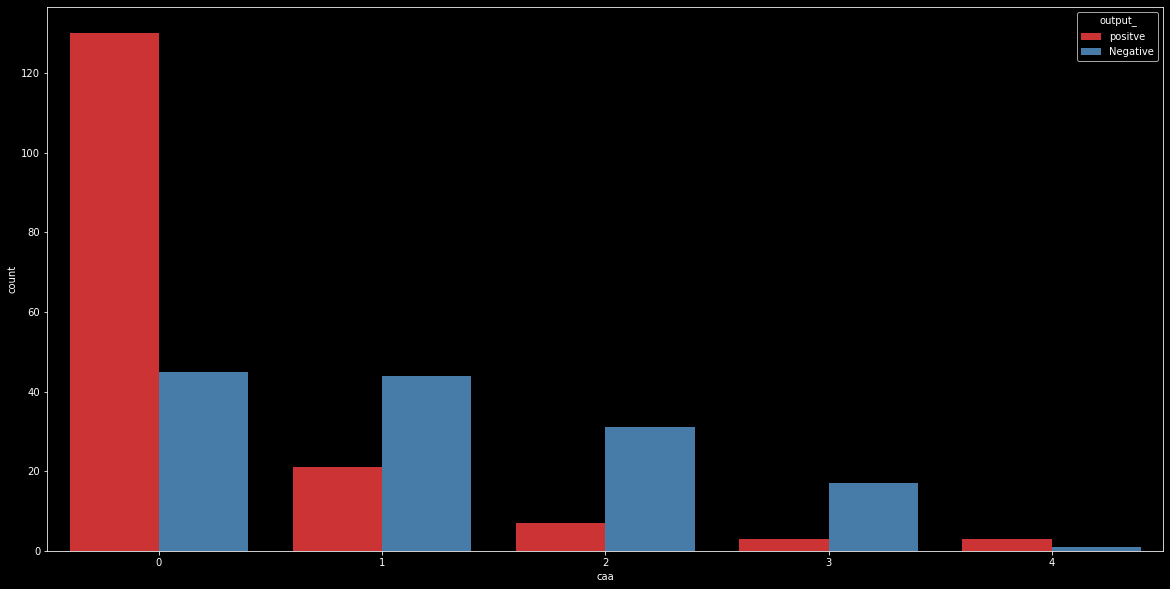

In [16]:
sns.countplot(x='caa',hue='output_',palette='Set1',data=df)
plt.show()

We can see that the chances of having a heart attack is more when there is the main vessele
is blocked allthough the blockage of any vessele may cause the heart attack

In [17]:
bins= [0,39,55,100]
labels = ['Young','Mid_age','old']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

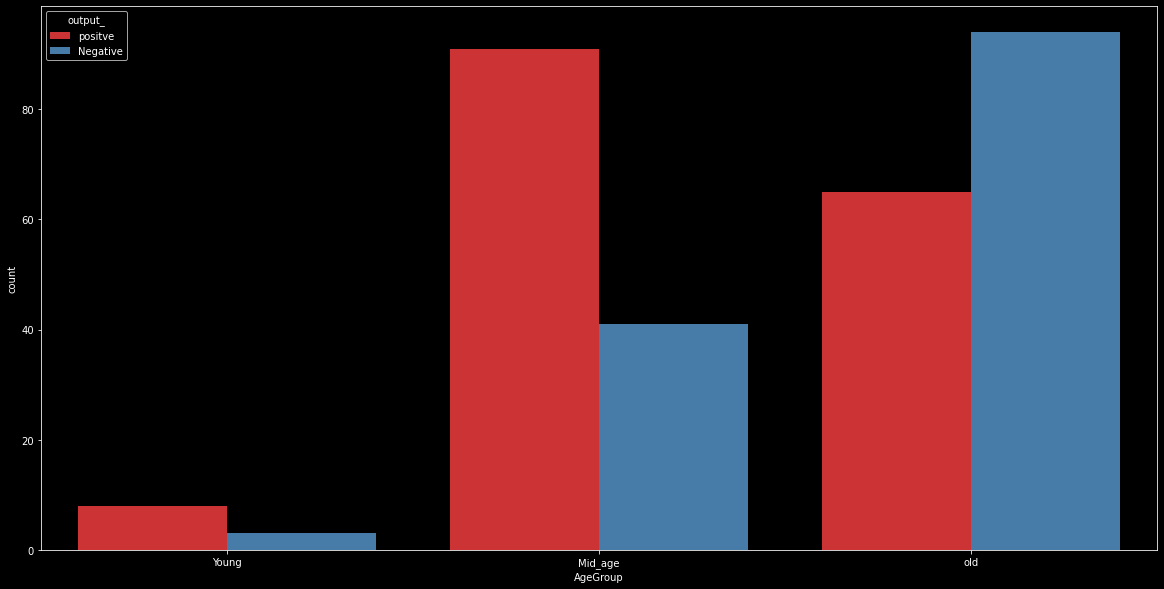

In [18]:

sns.countplot(x='AgeGroup',hue='output_',palette='Set1',data=df)
plt.show()

Mid age and old age people have more possibility of having a heart attack

<IPython.core.display.Javascript object>

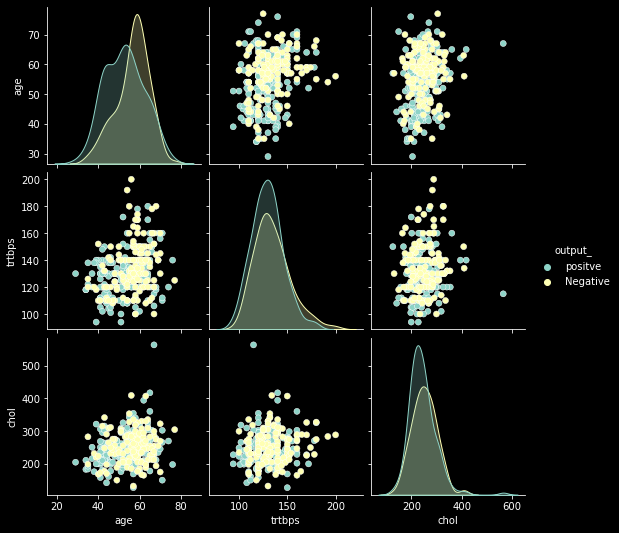

In [19]:
sns.pairplot(df, hue = 'output_', vars = ['age', 'trtbps', 'chol'] )

<IPython.core.display.Javascript object>

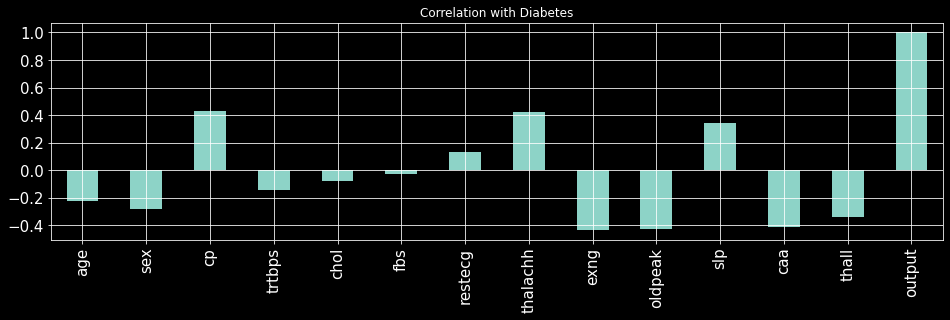

In [20]:
df.corrwith(df['output']).plot.bar(
        figsize = (16, 4), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)
plt.show()

### Data Processing

In [21]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'])

In [22]:
dataset.drop(['output_','fasting_blood_pressure','AgeGroup'],axis=1,inplace=True)

In [23]:
dataset.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset[['age','trtbps','chol','thalachh','oldpeak']] = scaler.fit_transform(dataset[['age','trtbps','chol','thalachh','oldpeak']])
dataset.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.166667,0.339623,0.283105,0.885496,0.564516,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


#### Dependent and Independent variable

In [25]:
x=dataset.drop(['output'],axis=1)
y=dataset['output']

Dividing the data into train and test

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=42)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report

## KNN

In [28]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(score.mean())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

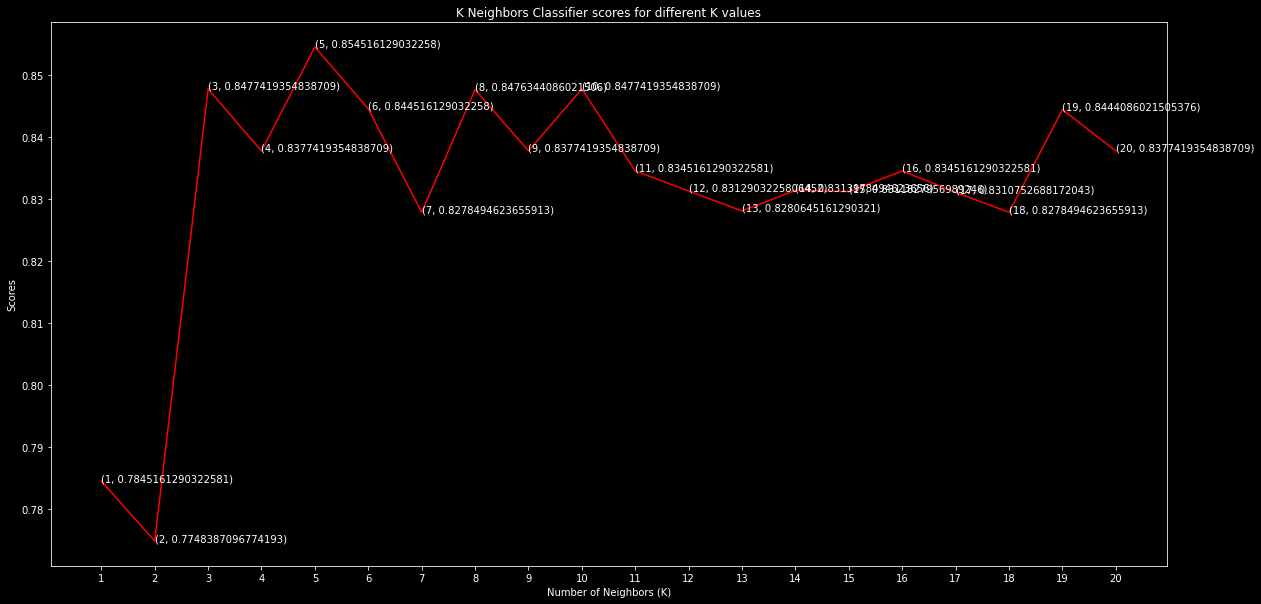

In [29]:
plt.figure(figsize=(20,10))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

In [30]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,x,y,cv=10)
score.mean()

0.8312903225806452

In [31]:
knn= KNeighborsClassifier(n_neighbors=14)
knn.fit(xtrain,ytrain)
train_pred =knn.predict (xtrain)
test_pred= knn.predict(xtest)
print('Training Accuracy :',accuracy_score(ytrain,train_pred))
print('Test Accuracy :',accuracy_score(ytest,test_pred))
print('Confusion Matrix: \n',confusion_matrix(ytest,test_pred))
print('classification Report : \n',classification_report(ytest,test_pred))

Training Accuracy : 0.8589211618257261
Test Accuracy : 0.8524590163934426
Confusion Matrix: 
 [[25  4]
 [ 5 27]]
classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(xtrain,ytrain)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [32]:
knn= KNeighborsClassifier(n_neighbors=5,leaf_size=1,p=2)
knn.fit(xtrain,ytrain)
train_pred =knn.predict (xtrain)
test_pred= knn.predict(xtest)
print('Training Accuracy :',accuracy_score(ytrain,train_pred))
print('Test Accuracy :',accuracy_score(ytest,test_pred))
print('Confusion Matrix: \n',confusion_matrix(ytest,test_pred))
print('classification Report : \n',classification_report(ytest,test_pred))

Training Accuracy : 0.8921161825726142
Test Accuracy : 0.8360655737704918
Confusion Matrix: 
 [[25  4]
 [ 6 26]]
classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



## Random Forest Classifier

In [33]:
randomforest_classifier= RandomForestClassifier(n_estimators=100)
score=cross_val_score(randomforest_classifier,x,y,cv=10)
score.mean()

0.8375268817204301

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report ,mean_squared_error ,confusion_matrix
rnd=RandomForestClassifier(n_estimators=100,random_state=42)
fit_model= rnd.fit(xtrain,ytrain)
rnd_score=rnd.score(xtest,ytest)
print('score for the model :',rnd_score*100)
#checking the classification Repoet


pred_rnd=rnd.predict(xtest)
print(classification_report(pred_rnd,ytest))
print(confusion_matrix(ytest,pred_rnd))



score for the model : 88.52459016393442
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.88      0.90      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.89        61
weighted avg       0.89      0.89      0.89        61

[[26  3]
 [ 4 28]]


In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [50,60,70,80, 90],
    'max_features': [2, 3,4],
    'min_samples_leaf': [1,2,3, 4],
    'min_samples_split': [2,4,6,8,9],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf_ = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(xtrain,ytrain)
grid_search.best_params_

In [35]:
grfc=RandomForestClassifier(bootstrap=True,max_depth=60,max_features=3,min_samples_leaf=1
                           ,min_samples_split=8,n_estimators=100)
grfc.fit(xtrain,ytrain)
G_Train_pred=grfc.predict(xtrain)
G_Test_pred=grfc.predict(xtest)
print('Training Accuracy :',accuracy_score(ytrain,G_Train_pred))
print('Test Accuracy :',accuracy_score(ytest,G_Test_pred))
print('Confusion Matrix: \n',confusion_matrix(ytest,G_Test_pred))
print('classification Report : \n',classification_report(ytest,G_Test_pred))



Training Accuracy : 0.9585062240663901
Test Accuracy : 0.9016393442622951
Confusion Matrix: 
 [[27  2]
 [ 4 28]]
classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



## XGboost classifier

In [36]:
import xgboost as xgb


In [37]:
xgb= xgb.XGBClassifier()
xgb.fit(xtrain,ytrain)
train_pred =xgb.predict (xtrain)
test_pred= xgb.predict(xtest)
print('Training Accuracy :',accuracy_score(ytrain,train_pred))
print('Test Accuracy :',accuracy_score(ytest,test_pred))
print('Confusion Matrix: \n',confusion_matrix(ytest,test_pred))
print('classification Report : \n',classification_report(ytest,test_pred))

[23:07:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy : 1.0
Test Accuracy : 0.8524590163934426
Confusion Matrix: 
 [[26  3]
 [ 6 26]]
classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [38]:
import xgboost as xgb
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100,
            'eval_metric':'mlogloss'
        }         
xgb_clf = xgb.XGBClassifier(**params)

xgb_clf.fit(xtrain,ytrain)

xgbh_train_pred=xgb_clf.predict(xtrain)
xgbh_test_pred=xgb_clf.predict(xtest)
print('Training Accuracy :',accuracy_score(ytrain,xgbh_train_pred))
print('Test Accuracy :',accuracy_score(ytest,xgbh_test_pred))
print('Confusion Matrix: \n',confusion_matrix(ytest,xgbh_test_pred))
print('classification Report : \n',classification_report(ytest,xgbh_test_pred))

Training Accuracy : 0.8672199170124482
Test Accuracy : 0.8032786885245902
Confusion Matrix: 
 [[26  3]
 [ 9 23]]
classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.88      0.72      0.79        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



## Conclusion

In [39]:
print('KNN ::',metrics.accuracy_score(ytest,test_pred))
print('RandomForest ::',metrics.accuracy_score(ytest,G_Test_pred))
print('XGBoost ::',metrics.accuracy_score(ytest,xgbh_test_pred))

<IPython.core.display.Javascript object>

KNN :: 0.8524590163934426


<IPython.core.display.Javascript object>

RandomForest :: 0.9016393442622951


<IPython.core.display.Javascript object>

XGBoost :: 0.8032786885245902


#### Deployment

In [40]:
import pickle
pickle.dump(grfc,open('attack_rand.pkl','wb'))
model=pickle.load(open('attack_rand.pkl','rb'))
result = model.score(xtest,ytest)
print(result)

0.9016393442622951
